## 파일 설명
- 최초 작성
- 신나는 1차 전처리

## import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
from matplotlib import rc
rc('font', family='Malgun Gothic') # 한글 폰트
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호출력 설정

# 불러오기

In [54]:
df = pd.read_csv('./data/rawdata.CSV', encoding='euc-kr')

In [55]:
df.head(2)

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자
0,2020,1,36,1,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,1.0,0.0,0,NaN,NaN,2021-12-29
1,2020,2,27,2,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,1.0,0.0,0,NaN,NaN,2021-12-29


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 31 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자 일련번호      1000000 non-null  int64  
 2   시도코드          1000000 non-null  int64  
 3   성별코드          1000000 non-null  int64  
 4   연령대 코드(5세단위)  1000000 non-null  int64  
 5   신장(5Cm단위)     1000000 non-null  int64  
 6   체중(5Kg 단위)    1000000 non-null  int64  
 7   허리둘레          999892 non-null   float64
 8   시력(좌)         999743 non-null   float64
 9   시력(우)         999748 non-null   float64
 10  청력(좌)         999778 non-null   float64
 11  청력(우)         999770 non-null   float64
 12  수축기 혈압        992468 non-null   float64
 13  이완기 혈압        992466 non-null   float64
 14  식전혈당(공복혈당)    992398 non-null   float64
 15  총 콜레스테롤       402306 non-null   float64
 16  트리글리세라이드      402322 non-null   float64
 17  HDL 콜레스테롤     402315 non-nul

# 전처리 
## 사용 안할 rows, columns 드롭

- 공통컬럼s : ['신장(5Cm단위)', '체중(5Kg 단위)', '시력(좌)', '시력(우)', '수축기 혈압', '이완기 혈압', '총 콜레스테롤', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피']
- 사용컬럼s : ['허리둘레', '식전혈당(공복혈당)', '흡연상태', '음주여부']
- 사용안할 행s : 여자

In [57]:
for i, col in enumerate(df.columns):
    print(i, ':', col)

0 : 기준년도
1 : 가입자 일련번호
2 : 시도코드
3 : 성별코드
4 : 연령대 코드(5세단위)
5 : 신장(5Cm단위)
6 : 체중(5Kg 단위)
7 : 허리둘레
8 : 시력(좌)
9 : 시력(우)
10 : 청력(좌)
11 : 청력(우)
12 : 수축기 혈압
13 : 이완기 혈압
14 : 식전혈당(공복혈당)
15 : 총 콜레스테롤
16 : 트리글리세라이드
17 : HDL 콜레스테롤
18 : LDL 콜레스테롤
19 : 혈색소
20 : 요단백
21 : 혈청크레아티닌
22 : (혈청지오티)AST
23 : (혈청지오티)ALT
24 : 감마 지티피
25 : 흡연상태
26 : 음주여부
27 : 구강검진 수검여부
28 : 치아우식증유무
29 : 치석
30 : 데이터 공개일자


In [58]:
df1 = df.iloc[:, [3, 4, 5, 6, 7, 8, 9, 12, 13, 14, 15, 21, 22, 23, 24, 25, 26]].copy()
df1.head(2)

,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부
0,1,9,165,60,72.1,1.2,1.5,127.0,79.0,90.0,188.0,1.1,21.0,27.0,21.0,1.0,0.0
1,2,13,150,65,81.0,0.8,0.8,110.0,73.0,87.0,NaN,0.5,18.0,15.0,15.0,1.0,0.0


In [59]:
df2 = df1[df1['성별코드'] == 1].copy()
df2['성별코드'].unique()

array([1], dtype=int64)

In [60]:
df2.reset_index(drop=True, inplace=True)

In [61]:
df2.drop(columns=['성별코드'], inplace=True)

In [63]:
df2.head(2)

,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부
0,9,165,60,72.1,1.2,1.5,127.0,79.0,90.0,188.0,1.1,21.0,27.0,21.0,1.0,0.0
1,13,160,70,90.8,1.0,1.0,134.0,84.0,146.0,NaN,1.2,65.0,97.0,72.0,1.0,0.0


## 공복혈당 결측치

In [64]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510689 entries, 0 to 510688
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   연령대 코드(5세단위)  510689 non-null  int64  
 1   신장(5Cm단위)     510689 non-null  int64  
 2   체중(5Kg 단위)    510689 non-null  int64  
 3   허리둘레          510648 non-null  float64
 4   시력(좌)         510561 non-null  float64
 5   시력(우)         510563 non-null  float64
 6   수축기 혈압        507976 non-null  float64
 7   이완기 혈압        507975 non-null  float64
 8   식전혈당(공복혈당)    507950 non-null  float64
 9   총 콜레스테롤       197112 non-null  float64
 10  혈청크레아티닌       507950 non-null  float64
 11  (혈청지오티)AST    507950 non-null  float64
 12  (혈청지오티)ALT    507949 non-null  float64
 13  감마 지티피        507950 non-null  float64
 14  흡연상태          510526 non-null  float64
 15  음주여부          510611 non-null  float64
dtypes: float64(13), int64(3)
memory usage: 62.3 MB


In [65]:
df3 = df2.copy()

In [69]:
df3.isna().sum()

연령대 코드(5세단위)         0
신장(5Cm단위)            0
체중(5Kg 단위)           0
허리둘레                41
시력(좌)              128
시력(우)              126
수축기 혈압            2713
이완기 혈압            2714
식전혈당(공복혈당)        2739
총 콜레스테롤         313577
혈청크레아티닌           2739
(혈청지오티)AST        2739
(혈청지오티)ALT        2740
감마 지티피            2739
흡연상태               163
음주여부                78
dtype: int64

In [73]:
df3.dropna(subset=['식전혈당(공복혈당)']).isna().sum()
df3.dropna(subset=['식전혈당(공복혈당)'], inplace=True)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 507950 entries, 0 to 510688
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   연령대 코드(5세단위)  507950 non-null  int64  
 1   신장(5Cm단위)     507950 non-null  int64  
 2   체중(5Kg 단위)    507950 non-null  int64  
 3   허리둘레          507909 non-null  float64
 4   시력(좌)         507828 non-null  float64
 5   시력(우)         507830 non-null  float64
 6   수축기 혈압        507938 non-null  float64
 7   이완기 혈압        507937 non-null  float64
 8   식전혈당(공복혈당)    507950 non-null  float64
 9   총 콜레스테롤       197112 non-null  float64
 10  혈청크레아티닌       507950 non-null  float64
 11  (혈청지오티)AST    507950 non-null  float64
 12  (혈청지오티)ALT    507949 non-null  float64
 13  감마 지티피        507950 non-null  float64
 14  흡연상태          507787 non-null  float64
 15  음주여부          507872 non-null  float64
dtypes: float64(13), int64(3)
memory usage: 65.9 MB


In [74]:
df3.reset_index(drop=True, inplace=True)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507950 entries, 0 to 507949
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   연령대 코드(5세단위)  507950 non-null  int64  
 1   신장(5Cm단위)     507950 non-null  int64  
 2   체중(5Kg 단위)    507950 non-null  int64  
 3   허리둘레          507909 non-null  float64
 4   시력(좌)         507828 non-null  float64
 5   시력(우)         507830 non-null  float64
 6   수축기 혈압        507938 non-null  float64
 7   이완기 혈압        507937 non-null  float64
 8   식전혈당(공복혈당)    507950 non-null  float64
 9   총 콜레스테롤       197112 non-null  float64
 10  혈청크레아티닌       507950 non-null  float64
 11  (혈청지오티)AST    507950 non-null  float64
 12  (혈청지오티)ALT    507949 non-null  float64
 13  감마 지티피        507950 non-null  float64
 14  흡연상태          507787 non-null  float64
 15  음주여부          507872 non-null  float64
dtypes: float64(13), int64(3)
memory usage: 62.0 MB


## 연령대 하나만 남김

In [75]:
df3.head()

,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부
0,9,165,60,72.1,1.2,1.5,127.0,79.0,90.0,188.0,1.1,21.0,27.0,21.0,1.0,0.0
1,13,160,70,90.8,1.0,1.0,134.0,84.0,146.0,NaN,1.2,65.0,97.0,72.0,1.0,0.0
2,9,185,85,94.0,1.2,1.2,114.0,72.0,86.0,234.0,1.1,25.0,32.0,26.0,3.0,1.0
3,9,165,80,93.0,0.8,0.7,112.0,73.0,250.0,119.0,0.7,18.0,20.0,35.0,3.0,1.0
4,13,160,65,92.0,0.5,0.5,131.0,79.0,93.0,NaN,1.2,18.0,17.0,19.0,3.0,0.0


In [84]:
desc = df3['연령대 코드(5세단위)'].describe()
desc

count    507950.000000
mean         11.760142
std           2.137697
min           9.000000
25%          10.000000
50%          11.000000
75%          13.000000
max          18.000000
Name: 연령대 코드(5세단위), dtype: float64

In [94]:
df3['연령대 코드(5세단위)'].unique()

array([ 9, 13, 14, 10, 11, 15, 17, 12, 16, 18], dtype=int64)

In [97]:
df3[df3['연령대 코드(5세단위)'] == 9].index

Int64Index([     0,      2,      3,     13,     18,     29,     40,     45,
                48,     56,
            ...
            507905, 507908, 507910, 507912, 507920, 507926, 507927, 507928,
            507931, 507948],
           dtype='int64', length=88433)

In [98]:
df4 = df3.copy()

In [99]:
df4 = df4[df4['연령대 코드(5세단위)'] == 9]

In [101]:
df4.reset_index(drop=True, inplace=True)

In [102]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88433 entries, 0 to 88432
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   연령대 코드(5세단위)  88433 non-null  int64  
 1   신장(5Cm단위)     88433 non-null  int64  
 2   체중(5Kg 단위)    88433 non-null  int64  
 3   허리둘레          88424 non-null  float64
 4   시력(좌)         88404 non-null  float64
 5   시력(우)         88405 non-null  float64
 6   수축기 혈압        88430 non-null  float64
 7   이완기 혈압        88430 non-null  float64
 8   식전혈당(공복혈당)    88433 non-null  float64
 9   총 콜레스테롤       45738 non-null  float64
 10  혈청크레아티닌       88433 non-null  float64
 11  (혈청지오티)AST    88433 non-null  float64
 12  (혈청지오티)ALT    88433 non-null  float64
 13  감마 지티피        88433 non-null  float64
 14  흡연상태          88400 non-null  float64
 15  음주여부          88428 non-null  float64
dtypes: float64(13), int64(3)
memory usage: 10.8 MB


##  결측치 : 총 콜레스테롤 drop

In [103]:
df5 = df4.copy()

In [104]:
df5.drop(columns=['총 콜레스테롤'], inplace=True)
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88433 entries, 0 to 88432
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   연령대 코드(5세단위)  88433 non-null  int64  
 1   신장(5Cm단위)     88433 non-null  int64  
 2   체중(5Kg 단위)    88433 non-null  int64  
 3   허리둘레          88424 non-null  float64
 4   시력(좌)         88404 non-null  float64
 5   시력(우)         88405 non-null  float64
 6   수축기 혈압        88430 non-null  float64
 7   이완기 혈압        88430 non-null  float64
 8   식전혈당(공복혈당)    88433 non-null  float64
 9   혈청크레아티닌       88433 non-null  float64
 10  (혈청지오티)AST    88433 non-null  float64
 11  (혈청지오티)ALT    88433 non-null  float64
 12  감마 지티피        88433 non-null  float64
 13  흡연상태          88400 non-null  float64
 14  음주여부          88428 non-null  float64
dtypes: float64(12), int64(3)
memory usage: 10.1 MB


In [105]:
df5.isna().sum()

연령대 코드(5세단위)     0
신장(5Cm단위)        0
체중(5Kg 단위)       0
허리둘레             9
시력(좌)           29
시력(우)           28
수축기 혈압           3
이완기 혈압           3
식전혈당(공복혈당)       0
혈청크레아티닌          0
(혈청지오티)AST       0
(혈청지오티)ALT       0
감마 지티피           0
흡연상태            33
음주여부             5
dtype: int64

## 결측치 : 흡연상태, 음주여부, 허리둘레 결측 행 drop

In [106]:
df6 = df5.copy()

In [109]:
df6.dropna(subset=['흡연상태', '음주여부', '허리둘레']).isna().sum()
df6.dropna(subset=['흡연상태', '음주여부', '허리둘레'], inplace=True)

In [111]:
df6.isna().sum()

연령대 코드(5세단위)     0
신장(5Cm단위)        0
체중(5Kg 단위)       0
허리둘레             0
시력(좌)           25
시력(우)           24
수축기 혈압           3
이완기 혈압           3
식전혈당(공복혈당)       0
혈청크레아티닌          0
(혈청지오티)AST       0
(혈청지오티)ALT       0
감마 지티피           0
흡연상태             0
음주여부             0
dtype: int64

In [113]:
df6.reset_index(drop=True, inplace=True)

In [114]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88388 entries, 0 to 88387
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   연령대 코드(5세단위)  88388 non-null  int64  
 1   신장(5Cm단위)     88388 non-null  int64  
 2   체중(5Kg 단위)    88388 non-null  int64  
 3   허리둘레          88388 non-null  float64
 4   시력(좌)         88363 non-null  float64
 5   시력(우)         88364 non-null  float64
 6   수축기 혈압        88385 non-null  float64
 7   이완기 혈압        88385 non-null  float64
 8   식전혈당(공복혈당)    88388 non-null  float64
 9   혈청크레아티닌       88388 non-null  float64
 10  (혈청지오티)AST    88388 non-null  float64
 11  (혈청지오티)ALT    88388 non-null  float64
 12  감마 지티피        88388 non-null  float64
 13  흡연상태          88388 non-null  float64
 14  음주여부          88388 non-null  float64
dtypes: float64(12), int64(3)
memory usage: 10.1 MB


In [116]:
df6.drop(columns=['연령대 코드(5세단위)'], inplace=True)

In [117]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88388 entries, 0 to 88387
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   신장(5Cm단위)   88388 non-null  int64  
 1   체중(5Kg 단위)  88388 non-null  int64  
 2   허리둘레        88388 non-null  float64
 3   시력(좌)       88363 non-null  float64
 4   시력(우)       88364 non-null  float64
 5   수축기 혈압      88385 non-null  float64
 6   이완기 혈압      88385 non-null  float64
 7   식전혈당(공복혈당)  88388 non-null  float64
 8   혈청크레아티닌     88388 non-null  float64
 9   (혈청지오티)AST  88388 non-null  float64
 10  (혈청지오티)ALT  88388 non-null  float64
 11  감마 지티피      88388 non-null  float64
 12  흡연상태        88388 non-null  float64
 13  음주여부        88388 non-null  float64
dtypes: float64(12), int64(2)
memory usage: 9.4 MB


## 이상치

(0.0, 300.0)

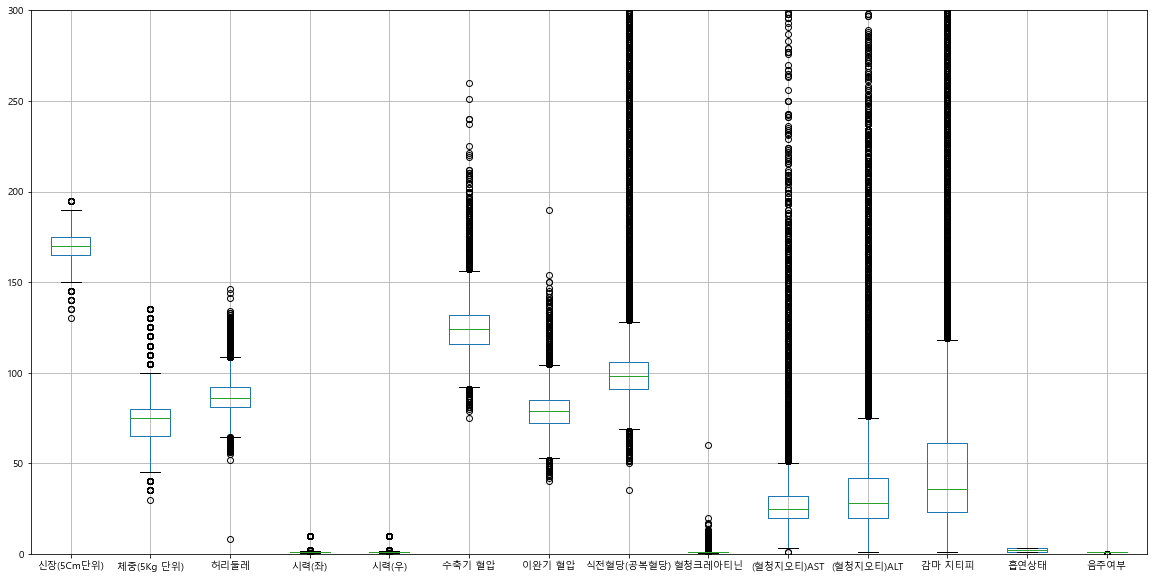

In [122]:
plt.figure(figsize=(20, 10))
df6.boxplot()
plt.ylim(0, 300)

## 이상치 : 신장

In [123]:
df7 = df6.copy()

<AxesSubplot:>

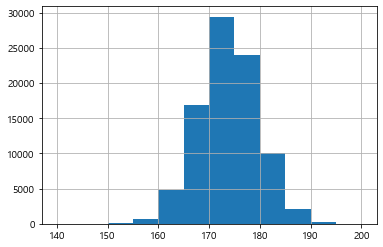

In [128]:
df7['신장(5Cm단위)'].hist(range=(140, 200), bins=12)

In [130]:
desc = df7['신장(5Cm단위)'].describe()
desc

count    88388.000000
mean       171.250283
std          5.992735
min        130.000000
25%        165.000000
50%        170.000000
75%        175.000000
max        195.000000
Name: 신장(5Cm단위), dtype: float64

In [131]:
q1 = desc['25%']
q3 = desc['75%']
iqr = q3 - q1

lw = q1 - iqr*1.5
uw = q3 + iqr*1.5

print(q1, q3, iqr)
print(lw, uw)

165.0 175.0 10.0
150.0 190.0


In [136]:
idx_drop = df7[(df7['신장(5Cm단위)'] > uw) | (df7['신장(5Cm단위)'] < lw)].index
idx_drop

Int64Index([ 4089,  5073,  5242, 10100, 15944, 18469, 19451, 20333, 20858,
            21934, 22590, 25271, 25670, 26056, 27071, 31006, 31781, 33273,
            37747, 38199, 43498, 43634, 47656, 49514, 50992, 51800, 54703,
            56567, 59464, 59653, 60638, 61331, 63316, 64568, 64895, 66816,
            67375, 67598, 70839, 73203, 73830, 76208, 77418, 78827, 82374,
            83498, 87176],
           dtype='int64')

In [137]:
df7.drop(index=idx_drop, inplace=True)
df7

,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부
0,165,60,72.1,1.2,1.5,127.0,79.0,90.0,1.1,21.0,27.0,21.0,1.0,0.0
1,185,85,94.0,1.2,1.2,114.0,72.0,86.0,1.1,25.0,32.0,26.0,3.0,1.0
2,165,80,93.0,0.8,0.7,112.0,73.0,250.0,0.7,18.0,20.0,35.0,3.0,1.0
3,165,55,77.5,1.5,1.5,130.0,70.0,87.0,0.9,18.0,10.0,15.0,1.0,0.0
4,165,75,84.0,1.0,1.0,139.0,80.0,92.0,0.9,27.0,30.0,25.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88383,170,75,89.0,1.5,1.2,124.0,86.0,107.0,1.0,20.0,35.0,34.0,3.0,0.0
88384,170,90,94.0,1.0,1.0,110.0,78.0,142.0,1.0,28.0,30.0,37.0,2.0,1.0
88385,165,70,82.0,1.0,1.2,138.0,86.0,104.0,0.9,35.0,46.0,52.0,2.0,1.0
88386,165,85,101.0,0.9,1.2,158.0,120.0,127.0,0.8,72.0,85.0,82.0,3.0,1.0


In [139]:
df7.reset_index(drop=True, inplace=True)

In [140]:
df7.head()

,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부
0,165,60,72.1,1.2,1.5,127.0,79.0,90.0,1.1,21.0,27.0,21.0,1.0,0.0
1,185,85,94.0,1.2,1.2,114.0,72.0,86.0,1.1,25.0,32.0,26.0,3.0,1.0
2,165,80,93.0,0.8,0.7,112.0,73.0,250.0,0.7,18.0,20.0,35.0,3.0,1.0
3,165,55,77.5,1.5,1.5,130.0,70.0,87.0,0.9,18.0,10.0,15.0,1.0,0.0
4,165,75,84.0,1.0,1.0,139.0,80.0,92.0,0.9,27.0,30.0,25.0,2.0,1.0


## 이상치 : 체중

In [141]:
df8 = df7.copy()

<AxesSubplot:>

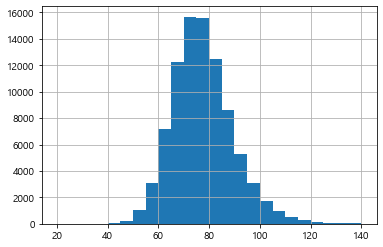

In [144]:
df8['체중(5Kg 단위)'].hist(range=(20, 140), bins=24)

<AxesSubplot:>

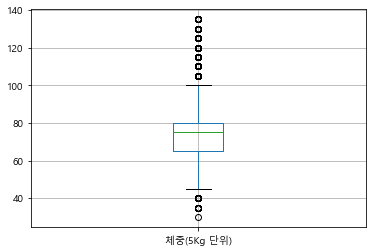

In [151]:
df8.loc[:, ['체중(5Kg 단위)']].boxplot()

In [148]:
desc = df8['체중(5Kg 단위)'].describe()
desc

count    88341.000000
mean        75.007245
std         12.043237
min         30.000000
25%         65.000000
50%         75.000000
75%         80.000000
max        135.000000
Name: 체중(5Kg 단위), dtype: float64

In [152]:
q1, q3 = desc['25%'], desc['75%']
iqr = q3 - q1
lw, uw = q1 - iqr*1.5, q3 + iqr*1.5

print(q1, q3, iqr)
print(lw, uw)

65.0 80.0 15.0
42.5 102.5


In [156]:
idx_drop = df8[(df8['체중(5Kg 단위)'] > uw) | (df8['체중(5Kg 단위)'] < lw)].index
idx_drop

Int64Index([   62,   112,   142,   234,   235,   283,   348,   368,   393,
              475,
            ...
            88021, 88035, 88058, 88103, 88135, 88158, 88163, 88225, 88245,
            88287],
           dtype='int64', length=2127)

In [157]:
df8.drop(index=idx_drop, inplace=True)
df8.reset_index(drop=True, inplace=True)

In [158]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86214 entries, 0 to 86213
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   신장(5Cm단위)   86214 non-null  int64  
 1   체중(5Kg 단위)  86214 non-null  int64  
 2   허리둘레        86214 non-null  float64
 3   시력(좌)       86191 non-null  float64
 4   시력(우)       86192 non-null  float64
 5   수축기 혈압      86211 non-null  float64
 6   이완기 혈압      86211 non-null  float64
 7   식전혈당(공복혈당)  86214 non-null  float64
 8   혈청크레아티닌     86214 non-null  float64
 9   (혈청지오티)AST  86214 non-null  float64
 10  (혈청지오티)ALT  86214 non-null  float64
 11  감마 지티피      86214 non-null  float64
 12  흡연상태        86214 non-null  float64
 13  음주여부        86214 non-null  float64
dtypes: float64(12), int64(2)
memory usage: 9.2 MB


## 이상치 : 허리둘레

In [159]:
df9 = df8.copy()

<AxesSubplot:>

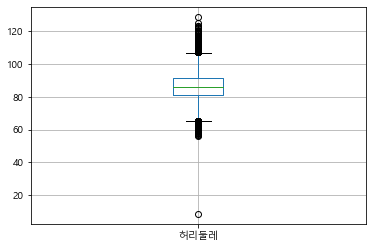

In [163]:
df9.loc[:, ['허리둘레']].boxplot()

<AxesSubplot:>

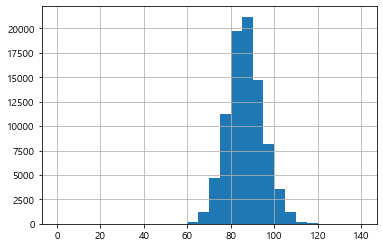

In [166]:
df9['허리둘레'].hist(range=(0, 140), bins=28)

In [167]:
desc = df9['허리둘레'].describe()
desc

count    86214.000000
mean        86.240431
std          8.165540
min          8.200000
25%         81.000000
50%         86.000000
75%         91.400000
max        128.800000
Name: 허리둘레, dtype: float64

In [168]:
q1, q3 = desc['25%'], desc['75%']
iqr = q3 - q1
lw = q1 - iqr*1.5
uw = q3 + iqr*1.5
print(q1, q3, iqr)
print(lw, uw)

81.0 91.4 10.400000000000006
65.39999999999999 107.00000000000001


In [172]:
idx_drop = df9[(df9['허리둘레'] > uw) | (df9['허리둘레'] < lw)].index

In [173]:
df9.drop(index=idx_drop, inplace=True)
df9.reset_index(drop=True, inplace=True)

In [174]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85281 entries, 0 to 85280
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   신장(5Cm단위)   85281 non-null  int64  
 1   체중(5Kg 단위)  85281 non-null  int64  
 2   허리둘레        85281 non-null  float64
 3   시력(좌)       85258 non-null  float64
 4   시력(우)       85259 non-null  float64
 5   수축기 혈압      85278 non-null  float64
 6   이완기 혈압      85278 non-null  float64
 7   식전혈당(공복혈당)  85281 non-null  float64
 8   혈청크레아티닌     85281 non-null  float64
 9   (혈청지오티)AST  85281 non-null  float64
 10  (혈청지오티)ALT  85281 non-null  float64
 11  감마 지티피      85281 non-null  float64
 12  흡연상태        85281 non-null  float64
 13  음주여부        85281 non-null  float64
dtypes: float64(12), int64(2)
memory usage: 9.1 MB


## 이상치 : 수축기 혈압

### 함수 : drop_outlier

In [3]:
def drop_outlier(df, col_name):
    desc = df[col_name].describe()
    q1, q3 = desc['25%'], desc['75%']
    iqr = q3 - q1
    lw = q1 - iqr*1.5
    uw = q3 + iqr*1.5
    print(q1, q3, iqr)
    print(lw, uw)
    idx_drop = df[(df[col_name] > uw) | (df[col_name] < lw)].index
    df.drop(index=idx_drop, inplace=True)
    df.reset_index(drop=True, inplace=True)
    return df

In [177]:
df10 = df9.copy()

In [178]:
df10.columns

Index(['신장(5Cm단위)', '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '수축기 혈압', '이완기 혈압',
       '식전혈당(공복혈당)', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태',
       '음주여부'],
      dtype='object')

<AxesSubplot:>

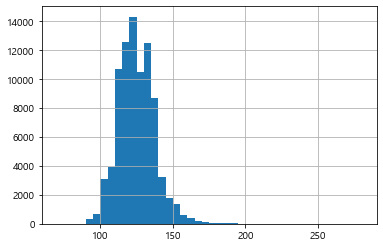

In [181]:
df10['수축기 혈압'].hist(range=(70, 280), bins=42)

<AxesSubplot:>

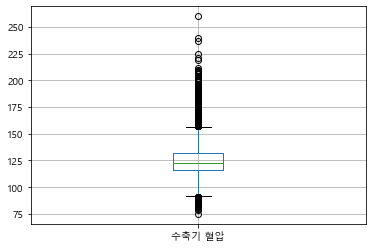

In [184]:
df10.loc[:, ['수축기 혈압']].boxplot()

In [185]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85281 entries, 0 to 85280
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   신장(5Cm단위)   85281 non-null  int64  
 1   체중(5Kg 단위)  85281 non-null  int64  
 2   허리둘레        85281 non-null  float64
 3   시력(좌)       85258 non-null  float64
 4   시력(우)       85259 non-null  float64
 5   수축기 혈압      85278 non-null  float64
 6   이완기 혈압      85278 non-null  float64
 7   식전혈당(공복혈당)  85281 non-null  float64
 8   혈청크레아티닌     85281 non-null  float64
 9   (혈청지오티)AST  85281 non-null  float64
 10  (혈청지오티)ALT  85281 non-null  float64
 11  감마 지티피      85281 non-null  float64
 12  흡연상태        85281 non-null  float64
 13  음주여부        85281 non-null  float64
dtypes: float64(12), int64(2)
memory usage: 9.1 MB


In [187]:
df10 = drop_outlier(df10, '수축기 혈압')
df10.info()

116.0 132.0 16.0
92.0 156.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83849 entries, 0 to 83848
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   신장(5Cm단위)   83849 non-null  int64  
 1   체중(5Kg 단위)  83849 non-null  int64  
 2   허리둘레        83849 non-null  float64
 3   시력(좌)       83826 non-null  float64
 4   시력(우)       83827 non-null  float64
 5   수축기 혈압      83846 non-null  float64
 6   이완기 혈압      83846 non-null  float64
 7   식전혈당(공복혈당)  83849 non-null  float64
 8   혈청크레아티닌     83849 non-null  float64
 9   (혈청지오티)AST  83849 non-null  float64
 10  (혈청지오티)ALT  83849 non-null  float64
 11  감마 지티피      83849 non-null  float64
 12  흡연상태        83849 non-null  float64
 13  음주여부        83849 non-null  float64
dtypes: float64(12), int64(2)
memory usage: 9.0 MB


## 이상치 : 이완기 혈압 ~ 감마 지티피

In [192]:
df11 = df10.copy()

In [193]:
for col in df10.columns[6:12]:
    print(col)
    df11 = drop_outlier(df11, col)

이완기 혈압
72.0 85.0 13.0
52.5 104.5
식전혈당(공복혈당)
91.0 106.0 15.0
68.5 128.5
혈청크레아티닌
0.8 1.0 0.19999999999999996
0.5000000000000001 1.2999999999999998
(혈청지오티)AST
20.0 31.0 11.0
3.5 47.5
(혈청지오티)ALT
19.0 37.0 18.0
-8.0 64.0
감마 지티피
22.0 51.0 29.0
-21.5 94.5


In [194]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62399 entries, 0 to 62398
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   신장(5Cm단위)   62399 non-null  int64  
 1   체중(5Kg 단위)  62399 non-null  int64  
 2   허리둘레        62399 non-null  float64
 3   시력(좌)       62380 non-null  float64
 4   시력(우)       62382 non-null  float64
 5   수축기 혈압      62396 non-null  float64
 6   이완기 혈압      62396 non-null  float64
 7   식전혈당(공복혈당)  62399 non-null  float64
 8   혈청크레아티닌     62399 non-null  float64
 9   (혈청지오티)AST  62399 non-null  float64
 10  (혈청지오티)ALT  62399 non-null  float64
 11  감마 지티피      62399 non-null  float64
 12  흡연상태        62399 non-null  float64
 13  음주여부        62399 non-null  float64
dtypes: float64(12), int64(2)
memory usage: 6.7 MB


## 결측치 drop

In [2]:
df12 = pd.read_pickle('./WHtR_concat/01/reduction_01.pkl')

In [3]:
df12.isna().sum()

신장(5Cm단위)      0
체중(5Kg 단위)     0
허리둘레           0
시력(좌)         19
시력(우)         17
수축기 혈압         3
이완기 혈압         3
식전혈당(공복혈당)     0
혈청크레아티닌        0
(혈청지오티)AST     0
(혈청지오티)ALT     0
감마 지티피         0
흡연상태           0
음주여부           0
dtype: int64

In [4]:
df12.dropna(inplace=True)

In [5]:
df12.isna().sum()

신장(5Cm단위)     0
체중(5Kg 단위)    0
허리둘레          0
시력(좌)         0
시력(우)         0
수축기 혈압        0
이완기 혈압        0
식전혈당(공복혈당)    0
혈청크레아티닌       0
(혈청지오티)AST    0
(혈청지오티)ALT    0
감마 지티피        0
흡연상태          0
음주여부          0
dtype: int64

In [7]:
df12.reset_index(inplace=True, drop=True)

# 이상치 : 시력(좌), 시력(우)

In [2]:
df13 = pd.read_pickle('./WHtR_concat/01/reduction_02.pkl')

In [4]:
df13.columns

Index(['신장(5Cm단위)', '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '수축기 혈압', '이완기 혈압',
       '식전혈당(공복혈당)', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태',
       '음주여부'],
      dtype='object')

In [5]:
df13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62377 entries, 0 to 62376
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   신장(5Cm단위)   62377 non-null  int64  
 1   체중(5Kg 단위)  62377 non-null  int64  
 2   허리둘레        62377 non-null  float64
 3   시력(좌)       62377 non-null  float64
 4   시력(우)       62377 non-null  float64
 5   수축기 혈압      62377 non-null  float64
 6   이완기 혈압      62377 non-null  float64
 7   식전혈당(공복혈당)  62377 non-null  float64
 8   혈청크레아티닌     62377 non-null  float64
 9   (혈청지오티)AST  62377 non-null  float64
 10  (혈청지오티)ALT  62377 non-null  float64
 11  감마 지티피      62377 non-null  float64
 12  흡연상태        62377 non-null  float64
 13  음주여부        62377 non-null  float64
dtypes: float64(12), int64(2)
memory usage: 6.7 MB


In [6]:
df13 = drop_outlier(df13, '시력(좌)')
df13 = drop_outlier(df13, '시력(우)')

0.9 1.2 0.29999999999999993
0.4500000000000001 1.65
0.9 1.2 0.29999999999999993
0.4500000000000001 1.65


In [7]:
df13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57903 entries, 0 to 57902
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   신장(5Cm단위)   57903 non-null  int64  
 1   체중(5Kg 단위)  57903 non-null  int64  
 2   허리둘레        57903 non-null  float64
 3   시력(좌)       57903 non-null  float64
 4   시력(우)       57903 non-null  float64
 5   수축기 혈압      57903 non-null  float64
 6   이완기 혈압      57903 non-null  float64
 7   식전혈당(공복혈당)  57903 non-null  float64
 8   혈청크레아티닌     57903 non-null  float64
 9   (혈청지오티)AST  57903 non-null  float64
 10  (혈청지오티)ALT  57903 non-null  float64
 11  감마 지티피      57903 non-null  float64
 12  흡연상태        57903 non-null  float64
 13  음주여부        57903 non-null  float64
dtypes: float64(12), int64(2)
memory usage: 6.2 MB


# 그룹화에 사용 가능 컬럼 선정